<a href="https://colab.research.google.com/github/galileo15640215/RNN/blob/master/simple_gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

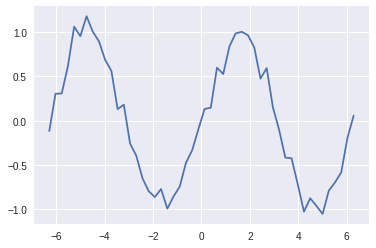

(40, 10, 1)
(40, 1)


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi) #-2piから2piまで
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data)) #sin関数に乱数でノイズを加える

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10 #時系列の数
n_sample = len(x_data)-n_rnn #サンプル数
x = np.zeros((n_sample, n_rnn)) #入力
t = np.zeros((n_sample, )) #正解、最後の時刻のみ
for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+n_rnn] #入力の時系列より一つ後の値
  
x = x.reshape(n_sample, n_rnn, 1) #(サンプル数,時系列の数,入力層のニューロン数)
print(x.shape)
t = t.reshape(n_sample, 1) #(サンプル数,入力層のニューロン数)
print(t.shape)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

#LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, n_in), return_sequences=False))
model_lstm.add(Dense(n_out, activation='linear'))
model_lstm.compile(loss='mean_squared_error', optimizer='sgd')
print(model_lstm.summary())

#GRU
model_gru = Sequential()
model_gru.add(GRU(n_mid, input_shape=(n_rnn, n_in), return_sequences=False))
model_gru.add(Dense(n_out, activation='linear'))
model_gru.compile(loss='mean_squared_error', optimizer='sgd')
print(model_gru.summary())

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 20)                1320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_____________________________________________________________

In [3]:
import time

epochs = 200

#LSTM
start_time = time.time()
history_lstm = model_lstm.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print('学習時間 --LSTM--:', time.time() - start_time)

#GRU
start_time = time.time()
history_gru = model_gru.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print('学習時間 --GRU--:', time.time() - start_time)

Instructions for updating:
Use tf.cast instead.
学習時間 --LSTM--: 5.941685676574707
学習時間 --GRU--: 4.636852502822876


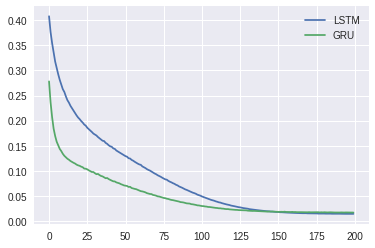

In [4]:
loss_lstm = history_lstm.history['loss']
loss_gru = history_gru.history['loss']

plt.plot(np.arange(len(loss_lstm)), loss_lstm, label='LSTM')
plt.plot(np.arange(len(loss_lstm)), loss_gru, label='GRU')
plt.legend()
plt.show()

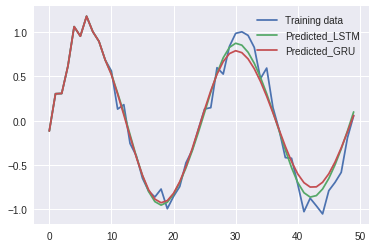

In [5]:
predicted_lstm = x[0].reshape(-1)
predicted_gru = x[0].reshape(-1)

for i in range(0, n_sample):
  y_lstm = model_lstm.predict(predicted_lstm[-n_rnn:].reshape(1, n_rnn, 1))
  predicted_lstm = np.append(predicted_lstm, y_lstm[0][0])
  y_gru = model_gru.predict(predicted_gru[-n_rnn:].reshape(1, n_rnn, 1))
  predicted_gru = np.append(predicted_gru, y_gru[0][0])
  
plt.plot(np.arange(len(sin_data)), sin_data, label = 'Training data')
plt.plot(np.arange(len(predicted_lstm)), predicted_lstm, label = 'Predicted_LSTM')
plt.plot(np.arange(len(predicted_gru)), predicted_gru, label = 'Predicted_GRU')
plt.legend()
plt.show()